In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch

# FGSM

## Single Layer Insertion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load accuracies from results file
eps_cnt = 5
layer_cnt = 21
accs_by_eps = {}
with open('/content/drive/MyDrive/DeepLearning/DeepLearningFinal/results/FGSM_All_Layer_Accuracy.txt','r') as file1:
  for jj in range(0,eps_cnt):
    # iterate over each epsilon
    accs = []
    layer_acc = {}
    for ii in range(0,layer_cnt+2):
      line = file1.readline()
      if ii == 0:
        eps = float(line.split('_')[1])
      else:
        layer_num = int(line.split(' ')[0])
        acc = (float(line.split(' ')[1]))
        layer_acc[layer_num] = acc
    accs_by_eps[eps] = layer_acc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


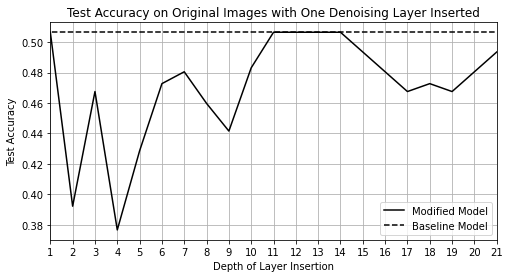

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


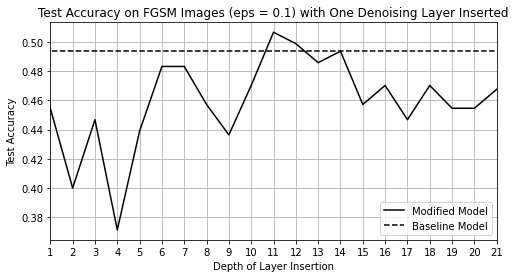

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


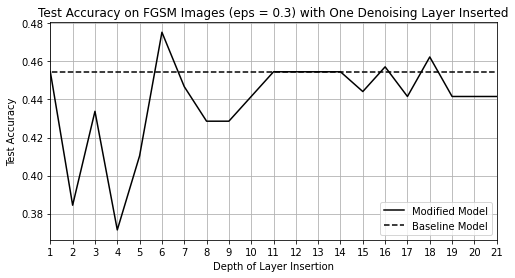

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


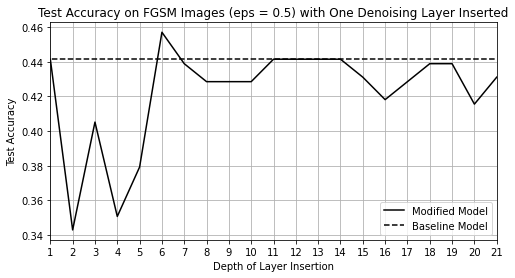

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


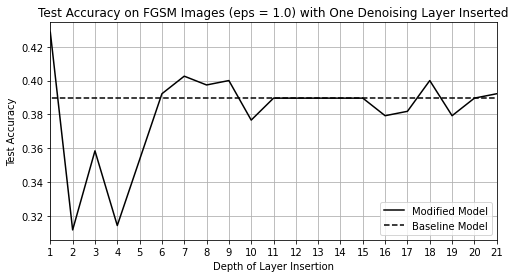

In [ ]:
out_dir = "/content/drive/MyDrive/DeepLearning/DeepLearningFinal/results/Final Plots/FGSM_singlelayer/"
x = np.arange(1,22)
for eps,layer_accs in accs_by_eps.items():
  baseline = layer_accs[0]
  # remove baseline
  layer_accs = {key:layer_accs[key] for key in range(1,22)}
  accs = []
  for layer_num, acc in layer_accs.items():
    accs.append(acc)
  plt.figure(figsize = (8,4))
    
  plt.plot(x, accs, color = 'k')
  xmin, xmx = plt.xlim()
  plt.hlines(baseline, xmin, xmx, linestyles='dashed')
  plt.xlabel('Depth of Layer Insertion')
  plt.ylabel('Test Accuracy')
  if eps == 0.0:
    plt.title("Test Accuracy on Original Images with One Denoising Layer Inserted")
  else:
    plt.title("Test Accuracy on FGSM Images (eps = {}) with One Denoising Layer Inserted". format(eps))
  plt.xlim(1, 21)
  plt.xticks(x)
  plt.legend(['Modified Model', 'Baseline Model'], loc = 'lower right')
  plt.grid()
  plt.savefig(out_dir+'FGSM_singlelayer_eps_{}.eps'.format(eps))
  plt.show()

## Multi Layer Insertion

In [ ]:
# Load accuracies from results file
eps_cnt = 5
layer_cnt = 5
accs_by_eps = {}
with open('/content/drive/MyDrive/DeepLearningFinal/results/FGSM_multilayer_accs.txt','r') as file1:
  for jj in range(0,eps_cnt):
    # iterate over each epsilon
    accs = []
    layer_acc = {}
    for ii in range(0,layer_cnt+2):
      line = file1.readline()
      if ii == 0:
        eps = float(line.split('_')[1])
      else:
        layer_num = int(line.split(' ')[0])
        acc = (float(line.split(' ')[1]))
        layer_acc[layer_num] = acc
    accs_by_eps[eps] = layer_acc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


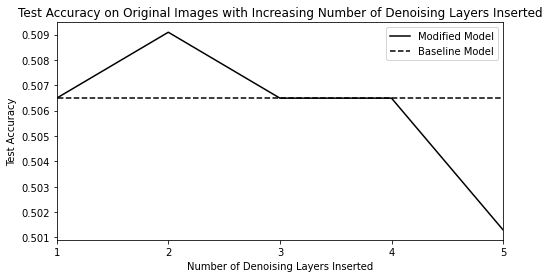

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


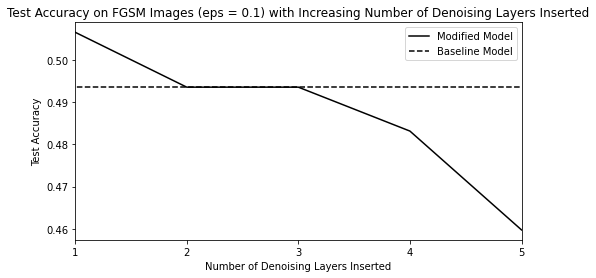

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


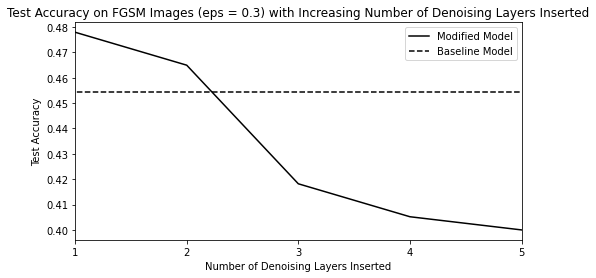

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


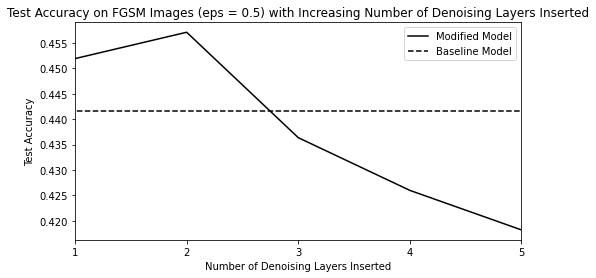

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


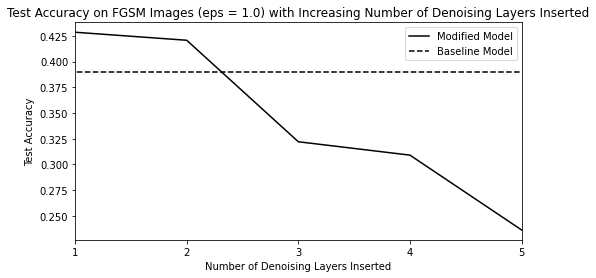

In [ ]:
out_dir = "/content/drive/MyDrive/DeepLearningFinal/results/Final Plots/FGSM_multilayer/"
for eps,layer_accs in accs_by_eps.items():
  baseline = layer_accs[0]
  # remove baseline
  layer_accs = {key:layer_accs[key] for key in range(1,6)}
  accs = []
  for layer_num, acc in layer_accs.items():
    accs.append(acc)
  plt.figure(figsize = (8,4))
    
  plt.plot(np.arange(1,len(accs)+1), accs, color = 'k')
  xmin, xmx = plt.xlim()
  plt.hlines(baseline, xmin, xmx, linestyles='dashed')
  plt.xlabel('Number of Denoising Layers Inserted')
  plt.ylabel('Test Accuracy')
  if eps == 0.0:
    plt.title("Test Accuracy on Original Images with Increasing Number of Denoising Layers Inserted")
  else:
    plt.title("Test Accuracy on FGSM Images (eps = {}) with Increasing Number of Denoising Layers Inserted". format(eps))
  plt.xlim(1, 5)
  plt.xticks(np.arange(1,len(accs)+1))
  plt.legend(['Modified Model', 'Baseline Model'], loc = 'upper right')
  # plt.grid()
  plt.savefig(out_dir+'FGSM_multilayer_eps_{}.eps'.format(eps))
  plt.show()

## Denoising Comparison

In [ ]:
# load accuracies from files
eps_cnt = 5
layer_cnt = 5
den_random_accs_by_eps = {}
with open('/content/drive/MyDrive/DeepLearningFinal/results/denoise_random_accs.txt','r') as file1:
  for jj in range(0,eps_cnt):
    # iterate over each epsilon
    accs = []
    layer_acc = {}
    for ii in range(0,layer_cnt+2):
      line = file1.readline()
      if ii == 0:
        eps = float(line.split('_')[1])
      else:
        layer_num = int(line.split(' ')[0])
        acc = (float(line.split(' ')[1]))
        layer_acc[layer_num] = acc
    den_random_accs_by_eps[eps] = layer_acc

den_all_accs_by_eps = {}
with open('/content/drive/MyDrive/DeepLearningFinal/results/denoise_all_accs.txt','r') as file1:
  for jj in range(0,eps_cnt):
    # iterate over each epsilon
    accs = []
    layer_acc = {}
    for ii in range(0,layer_cnt+2):
      line = file1.readline()
      if ii == 0:
        eps = float(line.split('_')[1])
      else:
        layer_num = int(line.split(' ')[0])
        acc = (float(line.split(' ')[1]))
        layer_acc[layer_num] = acc
    den_all_accs_by_eps[eps] = layer_acc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


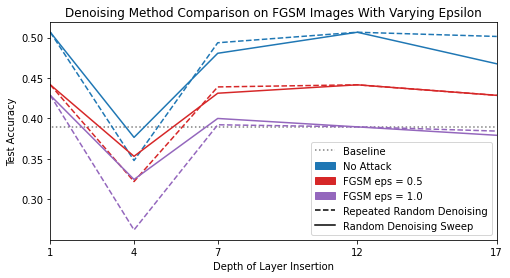

In [ ]:
out_dir = "/content/drive/MyDrive/DeepLearningFinal/results/Final Plots/"
plt.figure(figsize = (8,4))
x = [1,4,7,12,17]
eps_colors = {'0.0':'#1f77b4','0.1':'#ff7f0e','0.3':'#2ca02c','0.5':'#d62728','1.0':'#9467bd'}
for eps,layer_accs in den_random_accs_by_eps.items():
    baseline = layer_accs[0]
    # remove baseline
    layer_accs = {key:layer_accs[key] for key in range(1,6)}
    accs = []
    if eps == 0.0 or eps == 0.5 or eps == 1.0:
      for layer_num, acc in layer_accs.items():
        accs.append(acc)
      plt.plot(x,accs,linestyle='--',color=eps_colors[str(eps)]) 

for eps,layer_accs in den_all_accs_by_eps.items():
    # remove baseline
    layer_accs = {key:layer_accs[key] for key in range(1,6)}
    accs = []
    if eps ==0.0 or eps == 0.5 or eps == 1.0:
      for layer_num, acc in layer_accs.items():
        accs.append(acc)
      plt.plot(x,accs,color=eps_colors[str(eps)]) 

xmin, xmx = plt.xlim()
plt.hlines(baseline, xmin, xmx, linestyles=':',color='grey')
plt.xlabel('Depth of Layer Insertion')
plt.ylabel('Test Accuracy')
plt.title("Denoising Method Comparison on FGSM Images With Varying Epsilon". format(eps))
plt.xlim(1, 17)
plt.xticks(x)
line1 = Patch([],[],color='#1f77b4',label='No Attack')
line4 = Patch([],[],color='#d62728',label='FGSM eps = 0.5')
line5 = Patch([],[],color='#9467bd',label='FGSM eps = 1.0')
line6 = mlines.Line2D([],[],color='black',linestyle='--',label='Repeated Random Denoising')
line7 = mlines.Line2D([],[],color='black',label='Random Denoising Sweep')
line8 = mlines.Line2D([],[],color='grey',label='Baseline',linestyle=':')

plt.legend(handles=[line8,line1,line4,line5,line6,line7],loc='lower right')
plt.savefig(out_dir+'denoise_comparison.eps'.format(eps))
plt.show()

# DeepFool

## Single Layer Insertion

In [ ]:
# Load accuracies from results file
layer_cnt = 21
with open('/content/drive/MyDrive/DeepLearningFinal/results/DeepFool_all_layer_acc.txt','r') as file1:
  layer_accs = {}
  for ii in range(0,layer_cnt+1):
    line = file1.readline()
    layer_num = int(line.split(' ')[0])
    acc = (float(line.split(' ')[1]))
    layer_accs[layer_num] = acc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


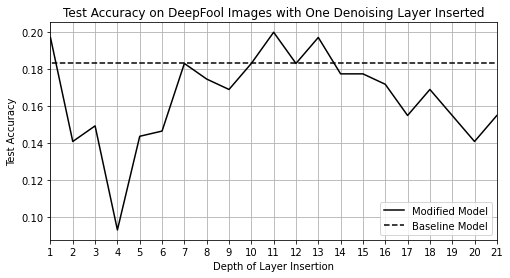

In [ ]:
out_dir = "/content/drive/MyDrive/DeepLearningFinal/results/Final Plots/DeepFool/"
x = np.arange(1,22)
baseline = layer_accs[0]
layer_accs = {key:layer_accs[key] for key in range(1,22)}
accs = []
for layer_num, acc in layer_accs.items():
  accs.append(acc)
plt.figure(figsize = (8,4))
  
plt.plot(x, accs, color = 'k')
xmin, xmx = plt.xlim()
plt.hlines(baseline, xmin, xmx, linestyles='dashed')
plt.xlabel('Depth of Layer Insertion')
plt.ylabel('Test Accuracy')
plt.title("Test Accuracy on DeepFool Images with One Denoising Layer Inserted")
plt.xlim(1,21)
plt.xticks(x)
plt.legend(['Modified Model', 'Baseline Model'], loc = 'lower right')
plt.grid()
plt.savefig(out_dir+'DeepFool_singlelayer.eps'.format(eps))
plt.show()

## Multi Layer Insertion

In [ ]:
layer_cnt = 5
with open('/content/drive/MyDrive/DeepLearningFinal/results/DeepFool_multilayer_accs.txt','r') as file1:
  layer_accs = {}
  for ii in range(0,layer_cnt+1):
    line = file1.readline()
    layer_num = int(line.split(' ')[0])
    acc = (float(line.split(' ')[1]))
    layer_accs[layer_num] = acc
baseline = layer_accs[0]
layer_accs = {key:layer_accs[key] for key in range(1,6)}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


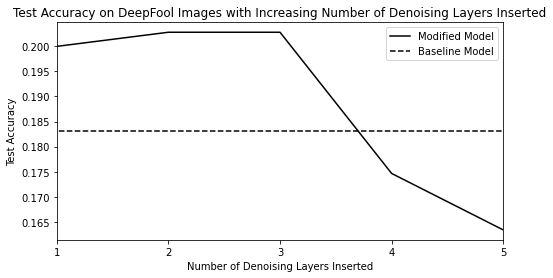

In [ ]:
out_dir = "/content/drive/MyDrive/DeepLearningFinal/results/Final Plots/DeepFool/"
x = np.arange(1,6)
accs = []
for layer_num, acc in layer_accs.items():
  accs.append(acc)
plt.figure(figsize = (8,4))
  
plt.plot(x, accs, color = 'k')
xmin, xmx = plt.xlim()
plt.hlines(baseline, xmin, xmx, linestyles='dashed')
plt.xlabel('Number of Denoising Layers Inserted')
plt.ylabel('Test Accuracy')
plt.title("Test Accuracy on DeepFool Images with Increasing Number of Denoising Layers Inserted")
plt.xlim(1,5)
plt.xticks(np.arange(1,len(accs)+1))
plt.legend(['Modified Model', 'Baseline Model'], loc = 'upper right')
plt.savefig(out_dir+'DeepFool_multilayer.eps'.format(eps))
plt.show()

# Combined

## Single Layer Insertion

In [ ]:
# Load accuracies from results file
# first FGSM
eps_cnt = 5
layer_cnt = 21
f_accs_by_eps = {}
with open('/content/drive/MyDrive/DeepLearning/DeepLearningFinal/results/FGSM_All_Layer_Accuracy.txt','r') as file1:
  for jj in range(0,eps_cnt):
    # iterate over each epsilon
    accs = []
    layer_acc = {}
    for ii in range(0,layer_cnt+2):
      line = file1.readline()
      if ii == 0:
        eps = float(line.split('_')[1])
      else:
        layer_num = int(line.split(' ')[0])
        acc = (float(line.split(' ')[1]))
        layer_acc[layer_num] = acc
    f_accs_by_eps[eps] = layer_acc

# now DeepFool
with open('/content/drive/MyDrive/DeepLearning/DeepLearningFinal/results/DeepFool_all_layer_acc.txt','r') as file1:
  d_layer_accs = {}
  for ii in range(0,layer_cnt+1):
    line = file1.readline()
    layer_num = int(line.split(' ')[0])
    acc = (float(line.split(' ')[1]))
    d_layer_accs[layer_num] = acc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


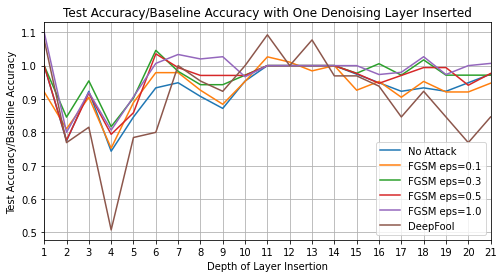

In [ ]:
out_dir = "/content/drive/MyDrive/DeepLearning/DeepLearningFinal/results/Final Plots/"
plt.figure(figsize = (8,4))
x = np.arange(1,22)
for eps,layer_accs in f_accs_by_eps.items():
  baseline = layer_accs[0]
  # remove baseline
  layer_accs = {key:layer_accs[key] for key in range(1,22)}
  accs = []
  for layer_num, acc in layer_accs.items():
    accs.append(acc/baseline)
  plt.plot(x, accs)

baseline = d_layer_accs[0]
d_layer_accs = {key:d_layer_accs[key] for key in range(1,22)}
accs = []
for layer_num, acc in d_layer_accs.items():
  accs.append(acc/baseline)
plt.plot(x, accs)
  
xmin, xmx = plt.xlim()
plt.xlabel('Depth of Layer Insertion')
plt.ylabel('Test Accuracy/Baseline Accuracy')
plt.title("Test Accuracy/Baseline Accuracy with One Denoising Layer Inserted")
plt.xlim(1,21)
plt.xticks(np.arange(1,22))
plt.legend(['No Attack', 'FGSM eps=0.1','FGSM eps=0.3','FGSM eps=0.5',\
            'FGSM eps=1.0','DeepFool'], loc = 'lower right')
plt.grid()
plt.savefig(out_dir+'Combined_singlelayer.eps'.format(eps))
plt.show()

##Relative to No Attack

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


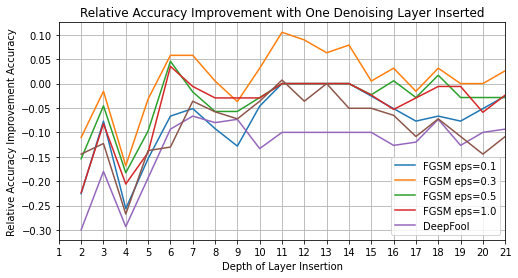

In [ ]:
plt.figure(figsize = (8,4))
x = np.arange(2,22)
for eps,layer_accs in f_accs_by_eps.items():
  baseline = layer_accs[0]
  no_att = layer_accs[1]
  # remove baseline & No Attacks
  layer_accs = {key:layer_accs[key] for key in range(2,22)}
  accs = []
  for layer_num, acc in layer_accs.items():
    accs.append((acc-no_att)/baseline)
  plt.plot(x, accs)

no_att = d_layer_accs[1]
d_layer_accs = {key:d_layer_accs[key] for key in range(2,22)}
accs = []
for layer_num, acc in d_layer_accs.items():
  accs.append((acc-no_att)/baseline)
plt.plot(x, accs)
  
xmin, xmx = plt.xlim()
plt.xlabel('Depth of Layer Insertion')
plt.ylabel('Relative Accuracy Improvement Accuracy')
plt.title("Relative Accuracy Improvement with One Denoising Layer Inserted")
plt.xlim(1,21)
plt.xticks(np.arange(1,22))
plt.legend(['FGSM eps=0.1','FGSM eps=0.3','FGSM eps=0.5',\
            'FGSM eps=1.0','DeepFool'], loc = 'lower right')
plt.grid()
plt.savefig(out_dir+'Improvement_single_layer.eps'.format(eps))
plt.show()

## Multi Layer Insertion

In [ ]:
# Load accuracies from results file
# first FGSM
eps_cnt = 5
layer_cnt = 5
f_accs_by_eps = {}
with open('/content/drive/MyDrive/DeepLearningFinal/results/FGSM_multilayer_accs.txt','r') as file1:
  for jj in range(0,eps_cnt):
    # iterate over each epsilon
    accs = []
    layer_acc = {}
    for ii in range(0,layer_cnt+2):
      line = file1.readline()
      if ii == 0:
        eps = float(line.split('_')[1])
      else:
        layer_num = int(line.split(' ')[0])
        acc = (float(line.split(' ')[1]))
        layer_acc[layer_num] = acc
    f_accs_by_eps[eps] = layer_acc

# now DeepFool
layer_cnt = 5
with open('/content/drive/MyDrive/DeepLearningFinal/results/DeepFool_multilayer_accs.txt','r') as file1:
  d_layer_accs = {}
  for ii in range(0,layer_cnt+1):
    line = file1.readline()
    layer_num = int(line.split(' ')[0])
    acc = (float(line.split(' ')[1]))
    d_layer_accs[layer_num] = acc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


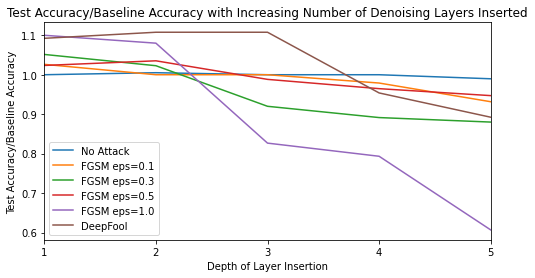

In [ ]:
out_dir = "/content/drive/MyDrive/DeepLearningFinal/results/Final Plots/"
plt.figure(figsize = (8,4))
x = np.arange(1,6)
for eps,layer_accs in f_accs_by_eps.items():
  baseline = layer_accs[0]
  # remove baseline
  layer_accs = {key:layer_accs[key] for key in range(1,6)}
  accs = []
  for layer_num, acc in layer_accs.items():
    accs.append(acc/baseline)
  plt.plot(x, accs)

baseline = d_layer_accs[0]
d_layer_accs = {key:d_layer_accs[key] for key in range(1,6)}
accs = []
for layer_num, acc in d_layer_accs.items():
  accs.append(acc/baseline)
plt.plot(x, accs)
  
xmin, xmx = plt.xlim()
plt.xlabel('Depth of Layer Insertion')
plt.ylabel('Test Accuracy/Baseline Accuracy')
plt.title("Test Accuracy/Baseline Accuracy with Increasing Number of Denoising Layers Inserted")
plt.xlim(1,5)
plt.xticks(np.arange(1,6))
plt.legend(['No Attack', 'FGSM eps=0.1','FGSM eps=0.3','FGSM eps=0.5',\
            'FGSM eps=1.0','DeepFool'], loc = 'lower left')
plt.savefig(out_dir+'Combined_multilayer.eps'.format(eps))
plt.show()